# Introdution
* A brief comparison among fires in Brazil.
* Amozonia Legal is the florest Amazon where is in the states: **Amazonas, Pará, Roraima, Amapa, Rondonia, Acre, Tocantins, Mato Grosso, Maranhao**

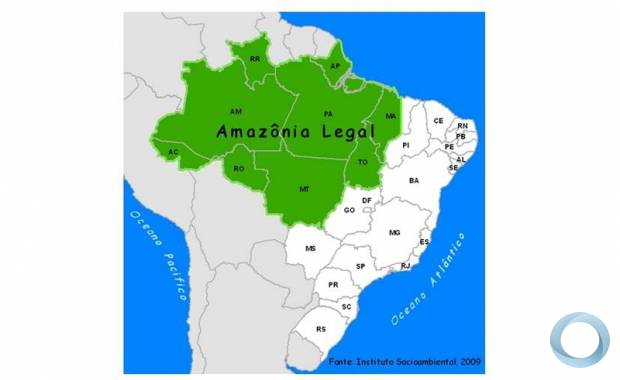

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## Import dataset

In [ ]:
import chardet
import pandas as pd
import matplotlib.pyplot as plt

def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

#Import with coding for words with letters like: ç, á ... 
my_encoding = find_encoding('../input/forest-fires-in-brazil/amazon.csv')
amazon = pd.read_csv("../input/forest-fires-in-brazil/amazon.csv",encoding=my_encoding)

## Sequence month

In [ ]:
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

#Order month
amazon['month'] = pd.Categorical(amazon['month'], categories=meses, ordered=True)

# Data processing


In [ ]:
amazon.head()

In [ ]:
# date column is unnecessary
amazon = amazon.drop(columns=['date'])

In [ ]:
amazon["state"].value_counts()

In [ ]:
amazon["month"].value_counts()

In [ ]:
amazon["year"].value_counts().sort_index()

In [ ]:
print(amazon[(amazon["state"] == "Rio") & (amazon["year"] == 1998)])
print(amazon[(amazon["state"] == "Amazonas") & (amazon["year"] == 1998)])

**There are 3 samples to Rio and 1 to Amazonas. We can aggregate this datas.**

In [ ]:
amazon = amazon.groupby(['state', 'month', 'year']).agg({"number": "sum"}).reset_index()

In [ ]:
amazon["state"].value_counts()

In [ ]:
amazon["month"].value_counts()

**Now we have same quantity of datas.**

In [ ]:
amazon[(amazon["year"] == 2017) & (amazon["state"] == 'Acre')]

**December 2017 is missing for all states**

# Data analysis

### States with the largest fires

In [ ]:
amazonia_legal = ['Amazonas', 'Pará', 'Roraima', 'Amapa', 'Rondonia', 'Acre', 'Tocantins', 'Mato Grosso', 'Maranhao']

estados = amazon.groupby('state')['number'].sum().sort_values(ascending=False)

ax = plt.gca()
colors = ['C0' if i not in amazonia_legal else 'r' for i in estados.index]
estados.plot(kind='bar',ax=ax,color=colors, figsize=(10, 5))
h,l = ax.get_legend_handles_labels()
ax.set_title("States with the largest fires")
ax.set_ylabel('Number of fires')
ax.set_xlabel('States')
ax.legend(["Amazonia Legal", "Other states"], labelspacing=2)

### Comparison between total fires and fires in Amazonia

In [ ]:
meses_incendio = amazon.groupby('month')['number'].sum()
meses_incendio_amazonia = amazon[amazon.state.isin(amazonia_legal)].groupby('month')['number'].sum()

ax = plt.gca()
meses_incendio.plot(kind='bar',x='month',y='number', ax=ax, stacked=True, figsize=(10, 5))
meses_incendio_amazonia.plot(kind='bar',x='month',y='number', ax=ax, stacked=True, color='r', figsize=(10, 5))
ax.set_title("Total fires and fires in Amazonia")
ax.set_ylabel('Number of fires')
ax.set_xlabel('Month')
ax.legend(["Total fires", "Fires in Amazon"])

### Fires growth in Amazonia and other regions

In [ ]:
queimadas_amazonia = amazon[amazon.state.isin(amazonia_legal)].groupby('year')['number'].sum()
queimadas_outras_regioes = amazonia = amazon[~amazon.state.isin(amazonia_legal)].groupby('year')['number'].sum()

ax = plt.gca()
queimadas_amazonia.plot(kind='line',x='year',y='number',ax=ax, figsize=(25, 5), color='r')
queimadas_outras_regioes.plot(kind='line',x='year',y='number',ax=ax, figsize=(25, 5))
ax.set_title("Fires growth")
ax.set_ylabel('Number of fires')
ax.legend(["Total fires", "Fires in Amazon"])
ax.legend(["Fire in Amazon", "Fire in other regions"])
ax.set_xlabel('Year')
ax.locator_params(integer=True)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 1))


# Precipitation ()

## Import dataset

In [ ]:
import pandas as pd
# https://www.kaggle.com/fabiopotsch/precipitation-in-brazil
precipitation = pd.read_csv("../input/precipitation-in-brazil/precipitation.csv")
precipitation.head()

## Acronym definition of states

In [ ]:
sigla_estado = {
    "AM" : "Amazonas",
    "PA" : "Pará",
    "RR" : "Roraima",
    "AP" : "Amapa",
    "RO" : "Rondonia",
    "AC" : "Acre",
    "TO" : "Tocantins",
    "MT" : "Mato Grosso",
    "MA" : "Maranhao",
    "AL" : "Alagoas",
    "BA" : "Bahia",
    "CE" : "Ceará",
    "DF" : "Distrito Federal",
    "ES" : "Espírito Santo",
    "GO" : "Goiás",
    "MG" : "Minas Gerais",
    "PB" : "Paraíba",
    "PR" : "Paraná",
    "PE" : "Pernambuco",
    "PI" : "Piauí",
    "RJ" : "Rio",
    "RN" : "Rio Grande do Norte",
    "RS" : "Rio Grande do Sul",
    "SP" : "São Paulo",
    "SE" : "Sergipe",
    "SC" : "Santa Catarina"
}

## Data processing

In [ ]:
precipitation['date'] =  pd.to_datetime(precipitation['date'], format='%d/%m/%Y')

precipitation['date'] = precipitation['date'] + pd.Timedelta(days=1)

precipitation['estado'] = precipitation['state'].replace(sigla_estado)

# There isn't data precipitacion in Rondonia
precipitation['estado'].value_counts()

In [ ]:
precipitation['month'] =  precipitation['date'].dt.month
precipitation['year'] =  precipitation['date'].dt.year
precipitation.head()

## Rainfall level by state

In [ ]:
estados_chuva = precipitation.groupby('estado')['precipitation'].sum().sort_values(ascending=False)

ax = plt.gca()
colors = ['C0' if i not in amazonia_legal else 'r' for i in estados_chuva.index]
estados_chuva.plot(kind='bar',ax=ax,color=colors, figsize=(10, 5))
h,l = ax.get_legend_handles_labels()
ax.set_title("Rain Level in Brazil")
ax.set_ylabel('Total Precipitation')
ax.set_xlabel('States')
ax.legend(["Amazonia Legal", "Other states"], labelspacing=2)

## Rainfall level by month

In [ ]:
meses_precipitation_amazonia = precipitation[precipitation.estado.isin(amazonia_legal)].groupby('month')['precipitation'].sum()
meses_precipitation_amazonia.index = [meses[i-1] for i in meses_precipitation_amazonia.index]

ax = plt.gca()
meses_precipitation_amazonia.plot(kind='bar',x='month',y='precipitation', ax=ax, stacked=True, color='b', figsize=(10, 5))
ax.set_title("Rain level in Amazonia")
ax.set_ylabel('Total Precipitation')
ax.set_xlabel('Month')
ax.legend(["Rain level"])

## Rainfall and fire level comparison in Amazon by Month

In [ ]:
meses_precipitation_amazonia = precipitation[precipitation.estado.isin(amazonia_legal)].groupby('month')['precipitation'].sum()
meses_precipitation_amazonia = meses_precipitation_amazonia / max(meses_precipitation_amazonia)
meses_precipitation_amazonia.index = [meses[i-1] for i in meses_precipitation_amazonia.index]

meses_incendio_amazonia = amazon[amazon.state.isin(amazonia_legal)].groupby('month')['number'].sum()
meses_incendio_amazonia = meses_incendio_amazonia / max(meses_incendio_amazonia)

fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(meses_precipitation_amazonia))
bar_width = 0.4
b1 = ax.bar(x, meses_precipitation_amazonia, width=bar_width, color='b', label='Rain')
b2 = ax.bar(x + bar_width, meses_incendio_amazonia, width=bar_width, color='r', label='Fire')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(meses_precipitation_amazonia.index, rotation=90)
ax.legend()
ax.set_title("Rain level vs Fire in Amazonia")
ax.set_ylabel('Growth Variation')
ax.set_xlabel('Month')


## Rainfall and fire level comparison in Amazonia by year

In [ ]:
queimadas_amazonia = amazon[amazon.state.isin(amazonia_legal)].groupby('year')['number'].sum()
precipitation_grafico = precipitation.groupby('year')['precipitation'].sum()

#Normalize datas for plot Growth
queimadas_amazonia = queimadas_amazonia / max(queimadas_amazonia)
precipitation_grafico = precipitation_grafico / max(precipitation_grafico)

ax = plt.gca()
queimadas_amazonia.plot(kind='line',x='year',y='number',ax=ax, figsize=(25, 5), color='r')
precipitation_grafico.plot(kind='line',x='date',y='precipitation',ax=ax, figsize=(25, 5), color='b')
ax.set_title("Fire vs Rain in Amazon")
ax.set_ylabel('Growth Variation')
ax.legend(["Total fires", "Rain level"])
ax.set_xlabel('Year')
ax.locator_params(integer=True)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end+1, 1))

## Rainfall and fire level comparison in states of Amazonia

In [ ]:
def definePlot(axs, indice, x, precipitation, amazon, estado):
    prec_estado = precipitation[precipitation.estado == estado].groupby('year')['precipitation'].sum()
    #y = prec_estado / max(prec_estado)
    y = prec_estado
    axs[indice].plot(x, y, '.-', color='b')
    fire_estado = amazon[amazon.state == estado].groupby('year')['number'].sum()
    #y = fire_estado / max(fire_estado)
    y=fire_estado
    axs[indice].plot(x, y, '.-', color='r')
    axs[indice].set_title(estado)
    axs[indice].legend(['Rain', 'Fire'])
    axs[indice].set_ylabel('Absolute values')
    return axs

fig, axs = plt.subplots(8, sharex=True, sharey=True)
fig.suptitle('Rain level vs Fire for States in absolute values')
fig.set_size_inches(20, 20)

x = precipitation[precipitation.estado == "Acre"].groupby('year')['precipitation'].sum().index

axs = definePlot(axs, 0, x, precipitation, amazon, "Amazonas")
axs = definePlot(axs, 1, x, precipitation, amazon, "Pará")
axs = definePlot(axs, 2, x, precipitation, amazon, "Roraima")
axs = definePlot(axs, 3, x, precipitation, amazon, "Amapa")
axs = definePlot(axs, 4, x, precipitation, amazon, "Acre")
axs = definePlot(axs, 5, x, precipitation, amazon, "Tocantins")
axs = definePlot(axs, 6, x, precipitation, amazon, "Mato Grosso")
axs = definePlot(axs, 7, x, precipitation, amazon, "Maranhao")

#axs[7].locator_params(integer=True)
start, end = axs[7].get_xlim()
axs[7].xaxis.set_ticks(np.arange(int(start), int(end)+1, 1))
axs[7].set_xlabel('Year')

plt.show()

## Rainfall and fire level comparison in states of Amazonia in relative values

In [ ]:
def definePlot(axs, indice, x, precipitation, amazon, estado):
    prec_estado = precipitation[precipitation.estado == estado].groupby('year')['precipitation'].sum()
    y = prec_estado / max(prec_estado)
    axs[indice].plot(x, y, '.-', color='b')
    fire_estado = amazon[amazon.state == estado].groupby('year')['number'].sum()
    y = fire_estado / max(fire_estado)
    axs[indice].plot(x, y, '.-', color='r')
    axs[indice].set_title(estado)
    axs[indice].legend(['Rain', 'Fire'])
    axs[indice].set_ylabel('Growth Variation')
    return axs

fig, axs = plt.subplots(8, sharex=True, sharey=True)
fig.suptitle('Rain level vs Fire for States in relative values')
fig.set_size_inches(20, 20)

x = precipitation[precipitation.estado == "Acre"].groupby('year')['precipitation'].sum().index

axs = definePlot(axs, 0, x, precipitation, amazon, "Amazonas")
axs = definePlot(axs, 1, x, precipitation, amazon, "Pará")
axs = definePlot(axs, 2, x, precipitation, amazon, "Roraima")
axs = definePlot(axs, 3, x, precipitation, amazon, "Amapa")
axs = definePlot(axs, 4, x, precipitation, amazon, "Acre")
axs = definePlot(axs, 5, x, precipitation, amazon, "Tocantins")
axs = definePlot(axs, 6, x, precipitation, amazon, "Mato Grosso")
axs = definePlot(axs, 7, x, precipitation, amazon, "Maranhao")

axs[7].locator_params(integer=True)
start, end = axs[7].get_xlim()
axs[7].xaxis.set_ticks(np.arange(int(start), int(end)+1, 1))
axs[7].set_xlabel('Year')

plt.show()

# Conclusion
* We can observe that the largest fires in Brazil do not occur in the Amazon, but in other forests;
* July and October have the highest number of burns;
* Only 2008 the fires in Amazon was bigger than fires in other regions;
* Mato Grosso is the state with the largest fires, but the next state of Amazonia Legal is the Tocantis in 9º place.
* Mato Grosso is not only 1 state, it is formed by Mato Grosso and Mato Grosso do Sul. Could not separate fires in the Amazon and in the Pantanal(other florest).
* At a glance, we don't see a large drop in rainfall throughout the period. But usually when there is a fall in the rain the fire increases.
* Mato Grosso is the state that has the most fire and has little rain
* 2009 there were many burnings and no fall in rainfall
* In Mato Grosso in 2009 there were many burnings
* Octuber there is many burnings and fall in rainfall
* There isn't data precipitacion in Rondonia
* Almost every rainy state is in the Amazonia Legal

# Next step
* Analyze in other forests of Brazil

PS.:
* Sorry for some grammar mistake. I am still studying
* I'm not minimizing the fire in the Amazon, I am just comparing with other fires of other forests that exists in Brazil. The problem is much bigger.